In [1]:
import pandas as pd
import numpy as np

In [2]:
pizza = {'diameter' : [6,8,10,14,18],
         'n_topping' : [2,1,0,2,0],
         'harga' : [7,9,13,17,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7
1,8,1,9
2,10,0,13
3,14,2,17
4,18,0,18


In [3]:
pizza = {'diameter' : [8,9,11,16,12],
         'n_topping' : [2,0,2,2,0],
         'harga' : [11,8,15,18,11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11
1,9,0,8
2,11,2,15
3,16,2,18
4,12,0,11


In [5]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train :\n{X_train}\n')
print(f'y_train :\n{y_train}\n')

X_train :
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train :
[ 7  9 13 17 18]



In [6]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_features = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_features.fit_transform(X_train)

print(f'X_train_quadratic : \n{X_train_quadratic}')

X_train_quadratic : 
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_quadratic,y_train)

LinearRegression()

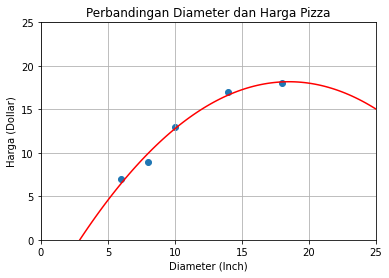

In [9]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0,25,100).reshape(-1,1)
X_vis_quadratic = quadratic_features.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train,y_train)
plt.plot(X_vis,y_vis_quadratic,'-r')


plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (Inch)')
plt.ylabel('Harga (Dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)

plt.show()

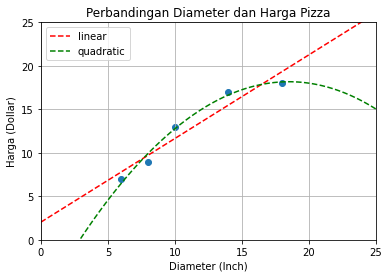

In [17]:
plt.scatter(X_train,y_train)

#Linear
model = LinearRegression()
model.fit(X_train,y_train)
X_vis = np.linspace(0,25,100).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis,y_vis,'--r',label = 'linear')

#Quadratic
quadratic_features = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic,y_train)
X_vis = np.linspace(0,25,100).reshape(-1,1)
X_vis_quadratic = quadratic_features.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)
plt.plot(X_vis,y_vis_quadratic,'--g', label = 'quadratic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (Inch)')
plt.ylabel('Harga (Dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.legend()
plt.show()